# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


# EDA

In [5]:
# Retrieve column names to understand the dataset structure
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
# Count the number of unique values in each column
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [7]:
# Getting the shape of the dataset
df.shape

(2200, 8)

In [8]:
# Checking null values of all the columns in the dataset
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
# Display summary information about the DataFrame (columns, data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
# Generate descriptive statistics for numerical columns
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
# Count the total number of duplicate rows in the DataFrame
df.duplicated().sum()

0

In [12]:
# Display the frequency count of each class in the 'label' column
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

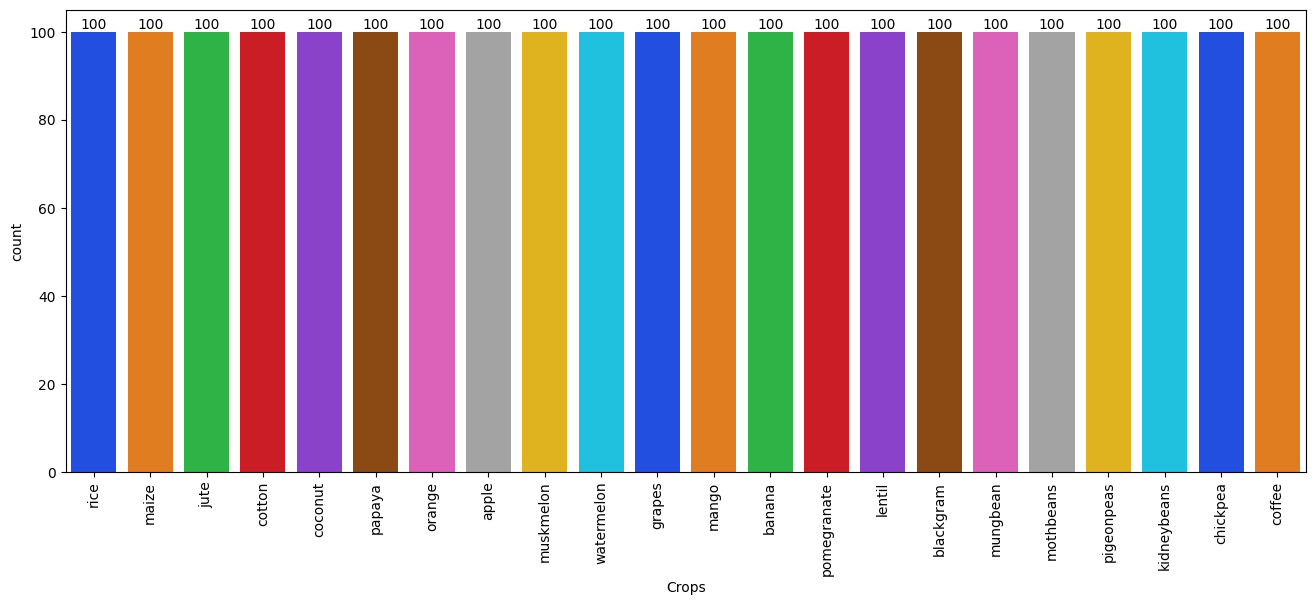

In [13]:
# Visualizing the distribution of label classes using a bar plot with value annotations
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.xlabel('Crops')
ax = sns.barplot(df['label'].value_counts(),palette="bright")
for container in ax.containers:
    ax.bar_label(container)

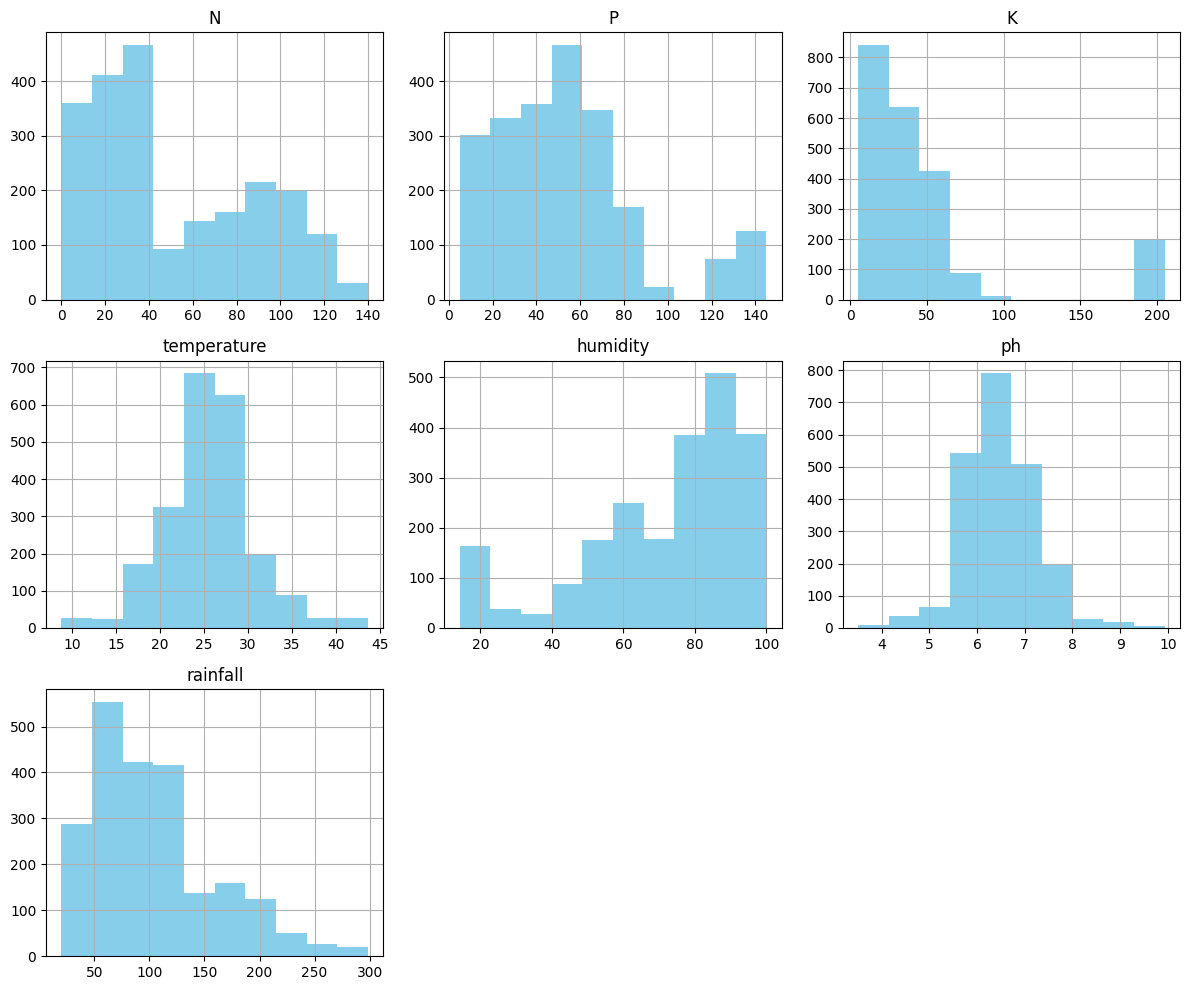

In [14]:
# Plotting histograms for all numerical features to visualize their distributions
df.hist(figsize=(12,10), color='skyblue')
plt.tight_layout()
plt.show()

In [15]:
# Find correlation between numerical features of teh dataset
df.corr(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


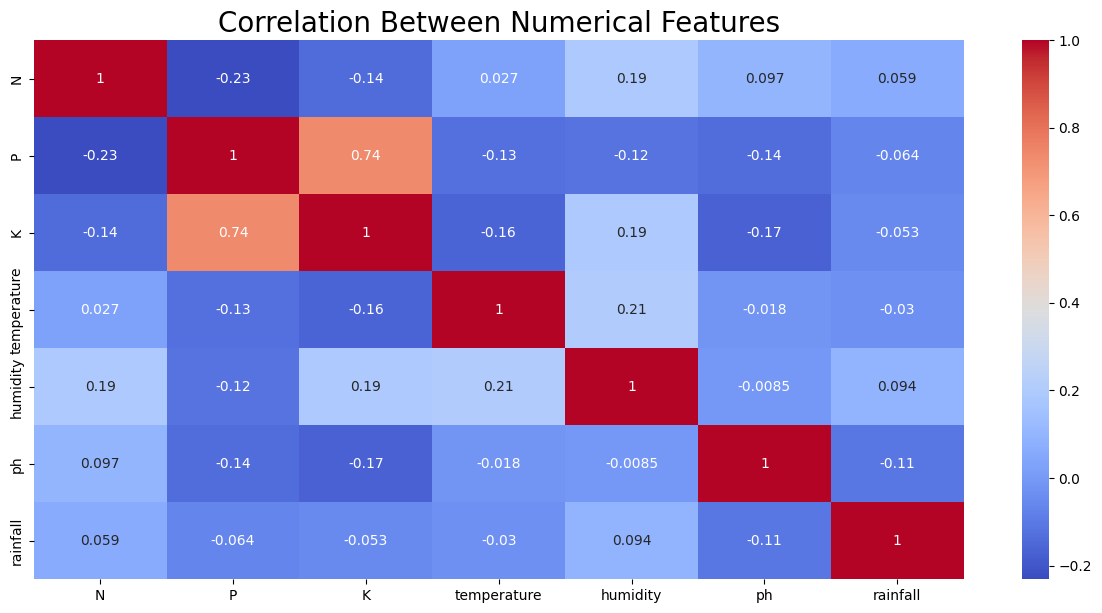

In [16]:
# Visualizing the correlation between numerical features using a heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features",fontsize=20)
plt.show()

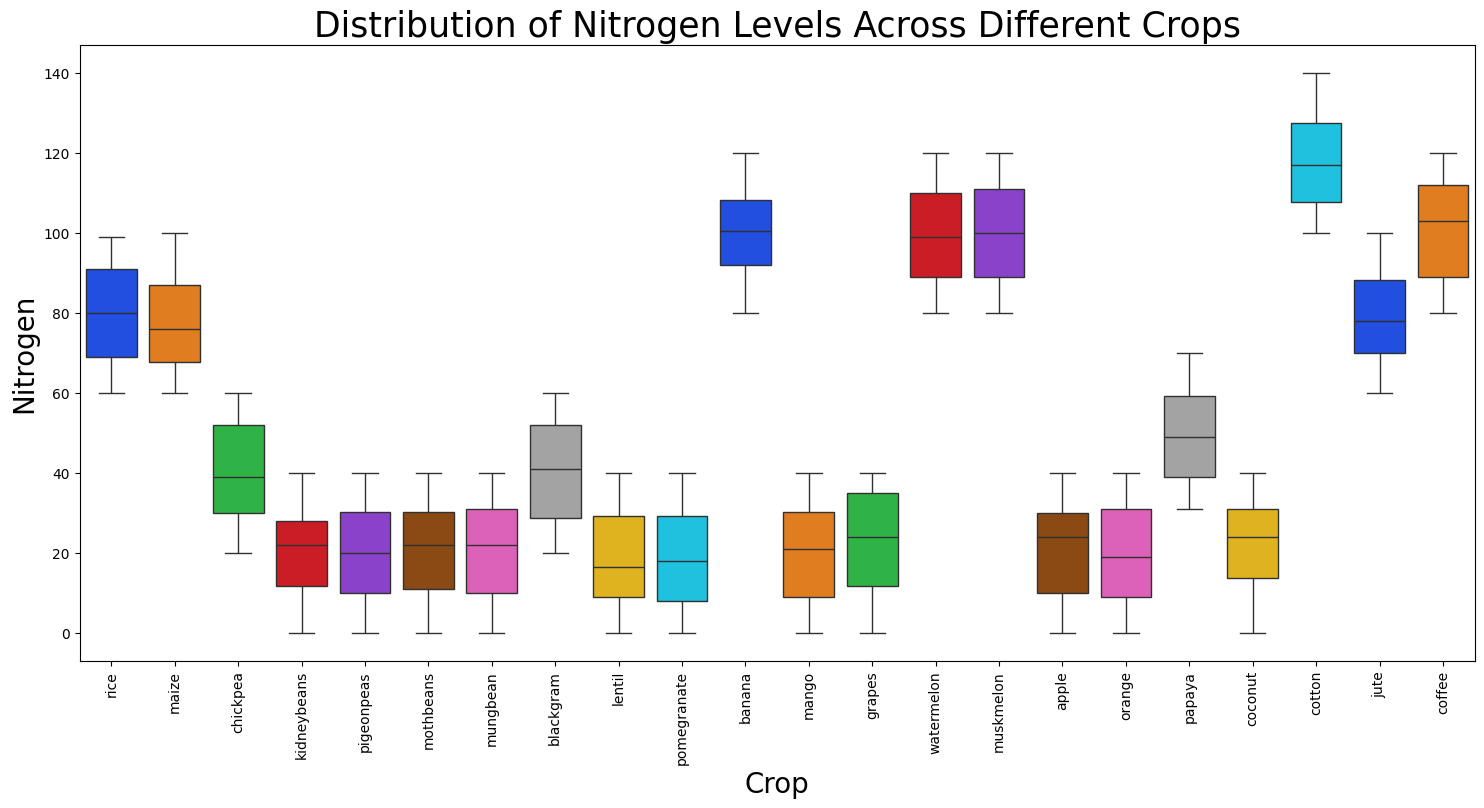

In [17]:
# Visualizing the distribution of Nitrogen levels across different crops using a boxplot
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.ylabel('Nitrogen',fontsize=20)
plt.xlabel('Crop',fontsize=20)
sns.boxplot(y=df['N'],x=df['label'],palette='bright')
plt.title("Distribution of Nitrogen Levels Across Different Crops",fontsize=25)
plt.show()

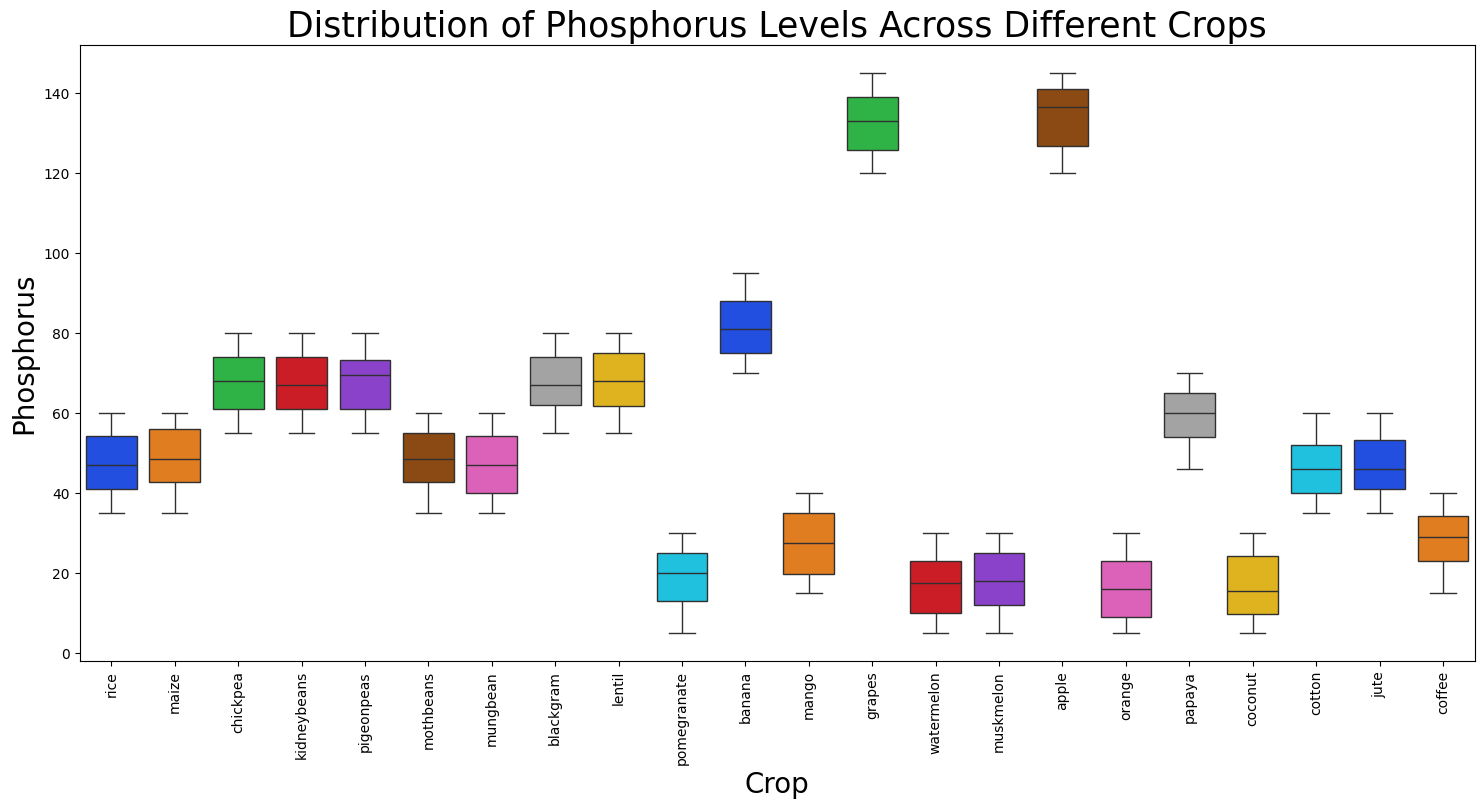

In [18]:
# Visualizing the distribution of Phosphorus levels across different crops using a boxplot
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.ylabel('Phosphorus',fontsize=20)
plt.xlabel('Crop',fontsize=20)
sns.boxplot(y=df['P'],x=df['label'],palette='bright')
plt.title("Distribution of Phosphorus Levels Across Different Crops",fontsize=25)
plt.show()

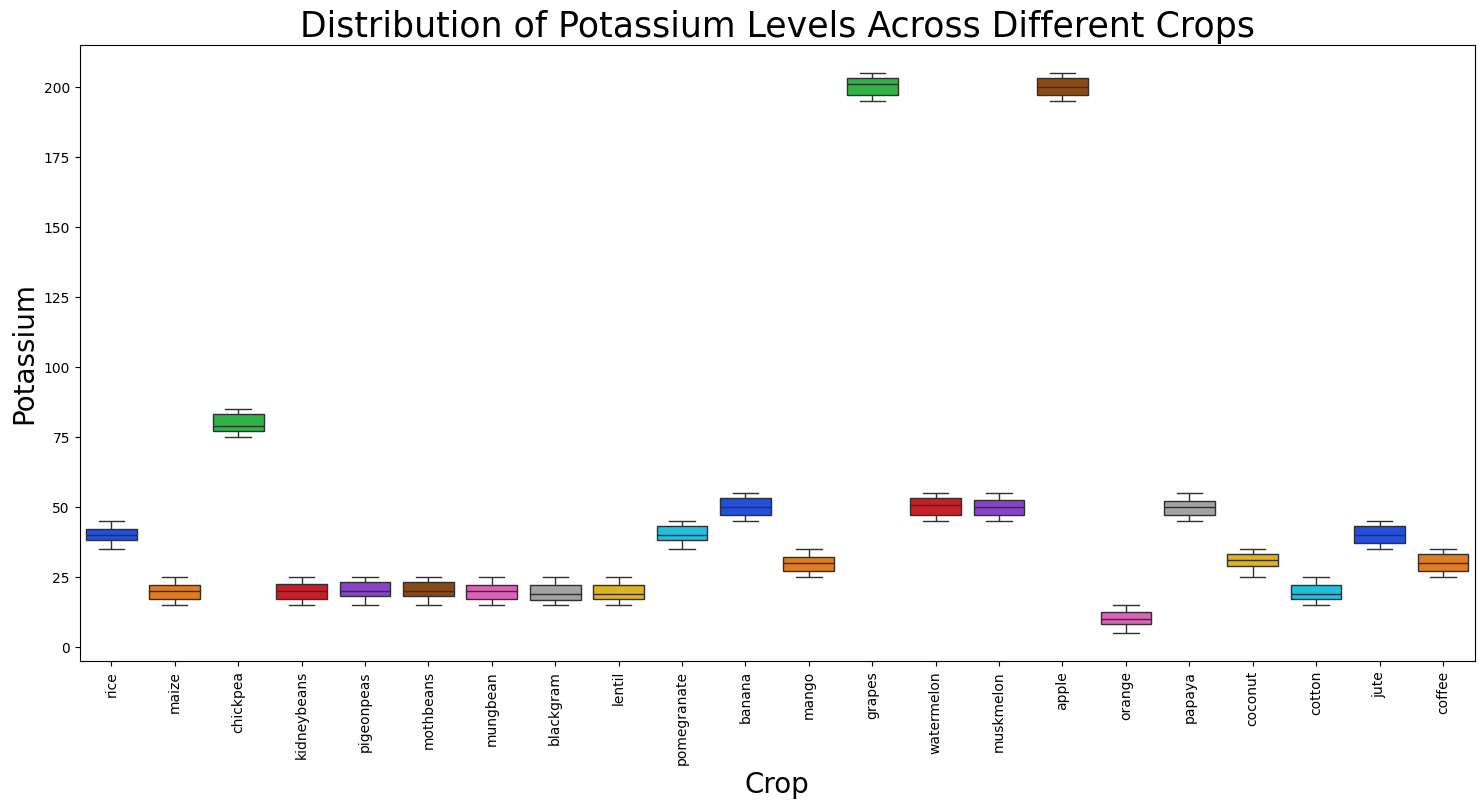

In [19]:
# Visualizing the distribution of Potassium levels across different crops using a boxplot
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.ylabel('Potassium',fontsize=20)
plt.xlabel('Crop',fontsize=20)
sns.boxplot(y=df['K'],x=df['label'],palette='bright')
plt.title("Distribution of Potassium Levels Across Different Crops",fontsize=25)
plt.show()

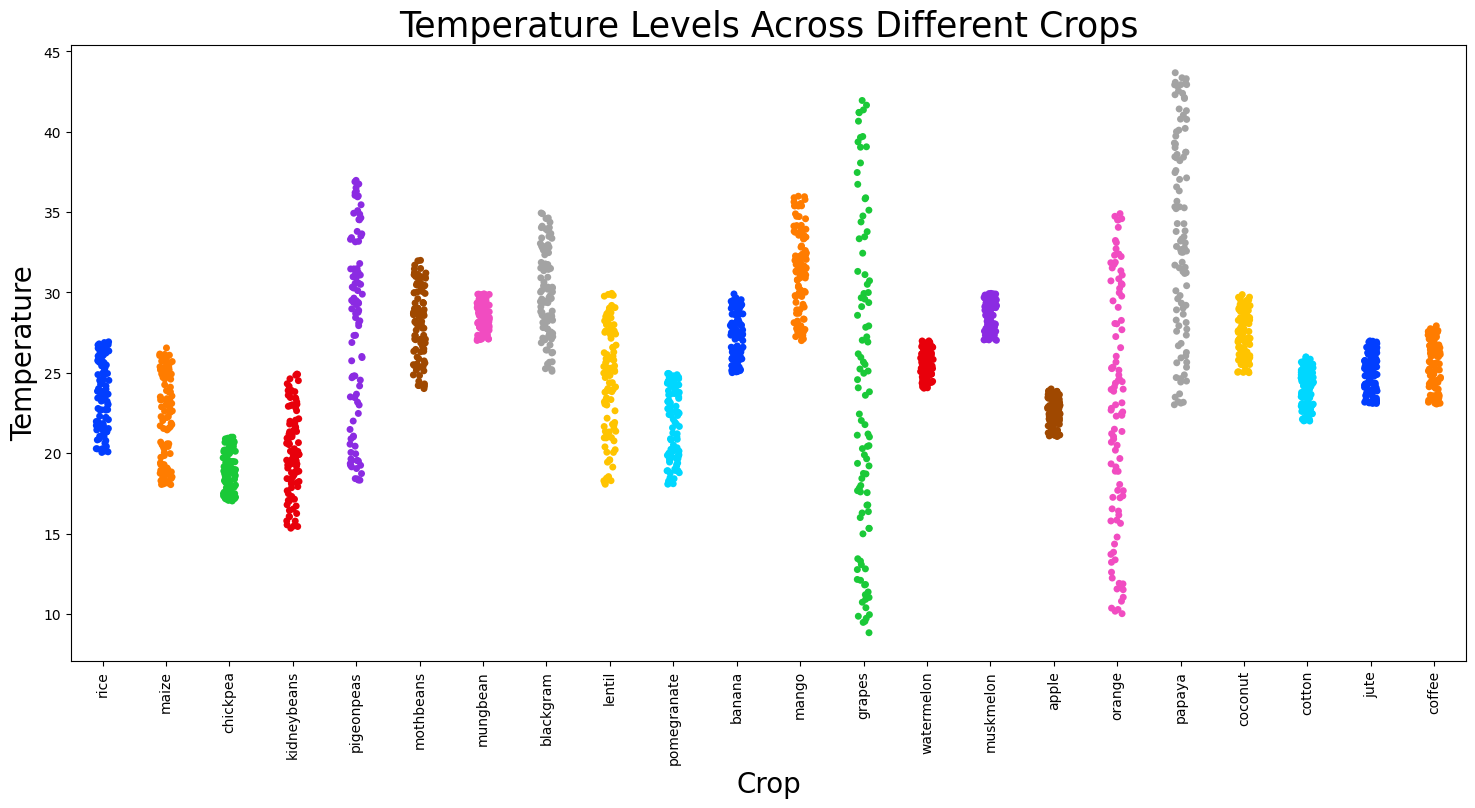

In [20]:
# Visualizing Temperature levels across different crops using a strip plot
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.ylabel('Temperature',fontsize=20)
plt.xlabel('Crop',fontsize=20)
sns.stripplot(y=df['temperature'],x=df['label'],palette='bright')
plt.title("Temperature Levels Across Different Crops",fontsize=25)
plt.show()

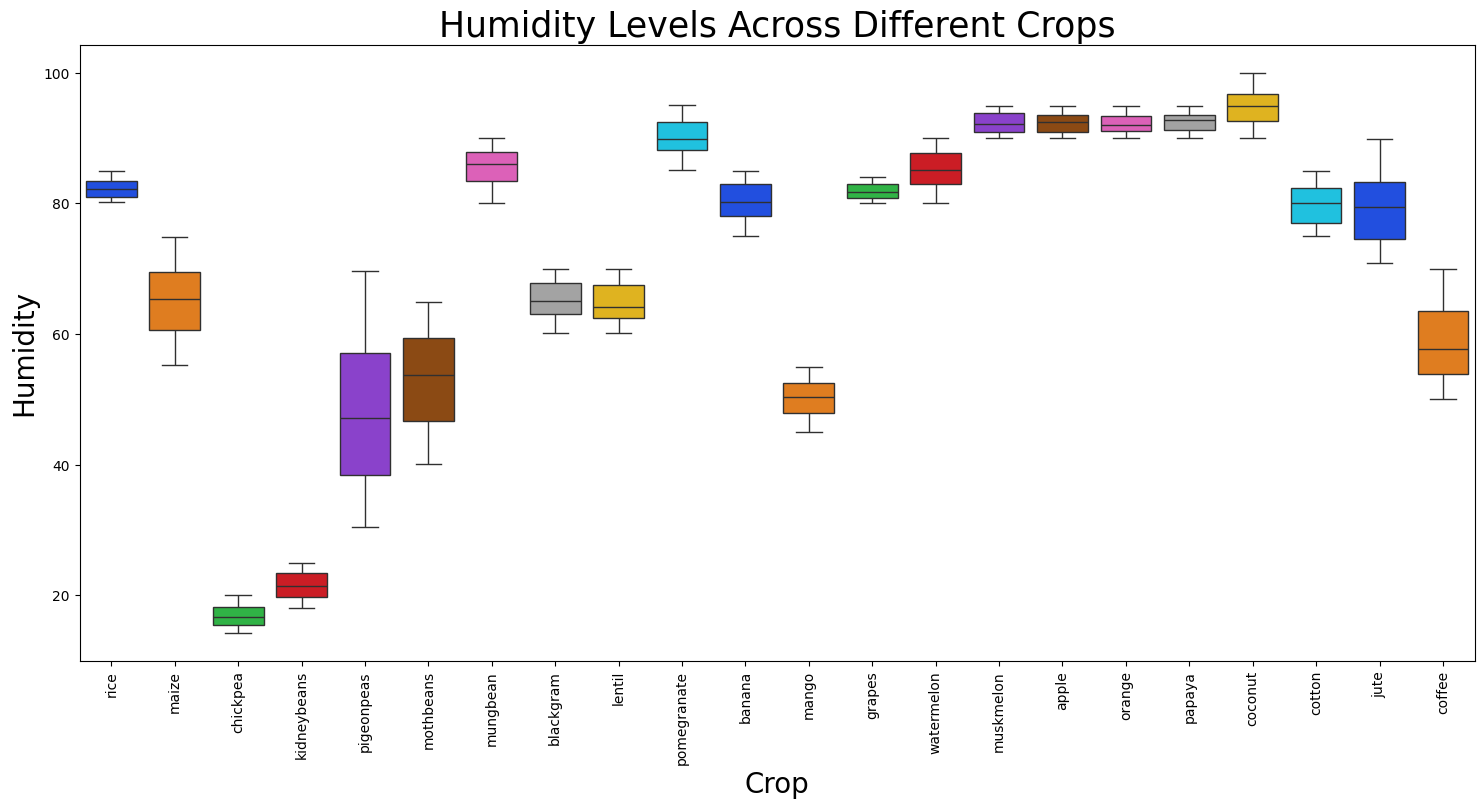

In [21]:
# Visualizing Humidity levels across different crops using a boxplot
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.ylabel('Humidity',fontsize=20)
plt.xlabel('Crop',fontsize=20)
sns.boxplot(y=df['humidity'],x=df['label'],palette='bright')
plt.title("Humidity Levels Across Different Crops",fontsize=25)
plt.show()

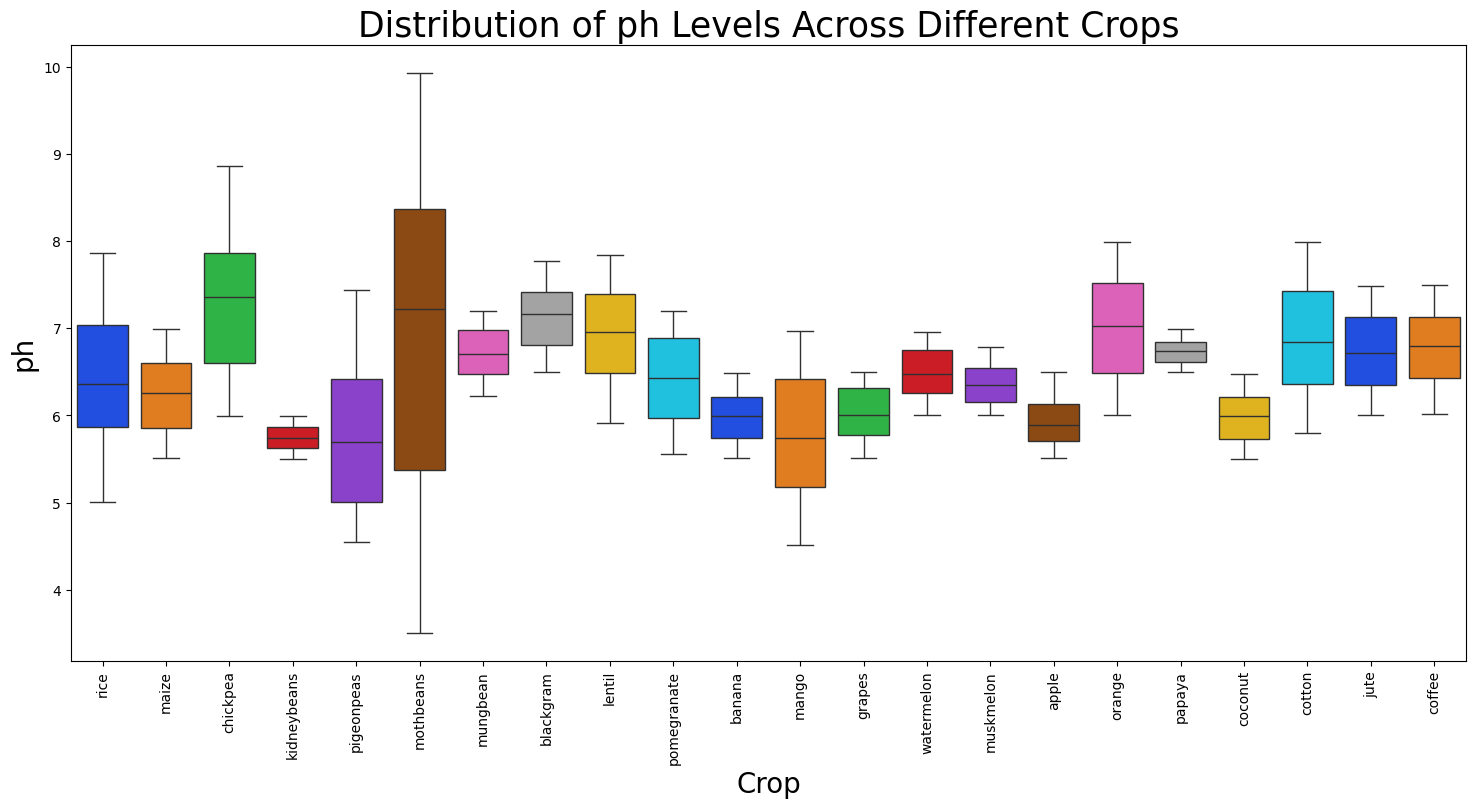

In [22]:
# Visualizing pH level across different crop types using a boxplot
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.ylabel('ph',fontsize=20)
plt.xlabel('Crop',fontsize=20)
sns.boxplot(y=df['ph'],x=df['label'],palette='bright')
plt.title("Distribution of ph Levels Across Different Crops",fontsize=25)
plt.show()

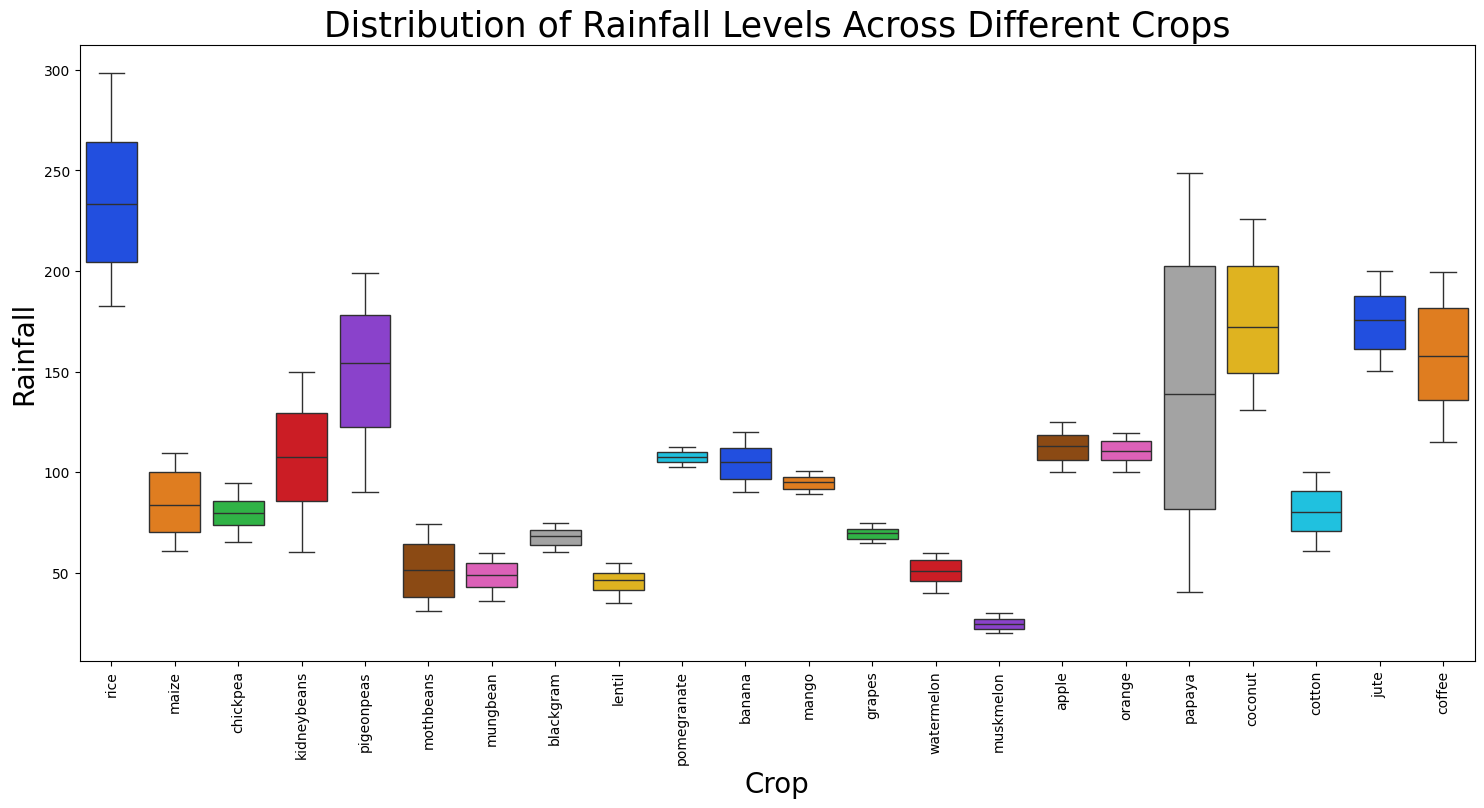

In [23]:
# Visualizing rainfall distribution across different crop types using a boxplot
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.ylabel('Rainfall',fontsize=20)
plt.xlabel('Crop',fontsize=20)
sns.boxplot(y=df['rainfall'],x=df['label'],palette='bright')
plt.title("Distribution of Rainfall Levels Across Different Crops",fontsize=25)
plt.show()

# Data Preprocessing and Training

In [24]:
# Label Encoding Converting Categorical data into Numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [25]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [26]:
X = df.drop(['label','label_encoded'],axis=1)
y = df['label_encoded']

In [27]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [28]:
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label_encoded, dtype: int32

In [29]:
# Splitting the data into training and testing part
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [30]:
# Train the model
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
# Checking model accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy*100)
print("Testing Accuracy:", test_accuracy*100)


Training Accuracy: 100.0
Testing Accuracy: 97.95454545454545


Accuracy: 0.9795454545454545


<Axes: >

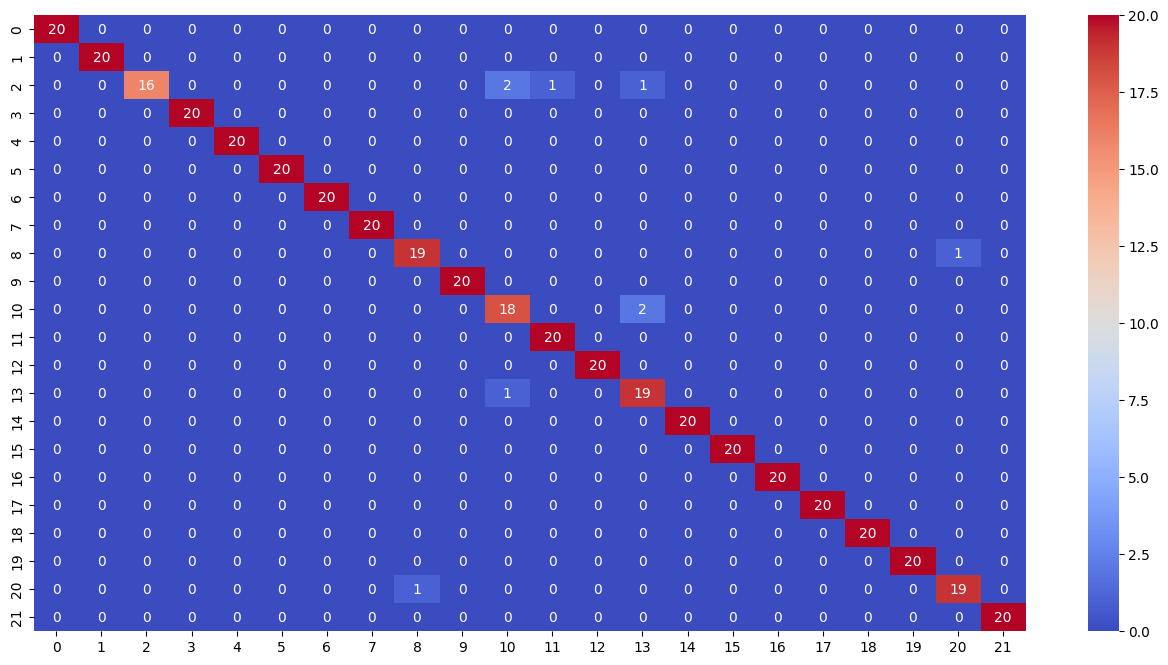

In [32]:
# Evaluate the model's performance using accuracy and a confusion matrix heatmap
from sklearn.metrics import accuracy_score,confusion_matrix

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(16,8))
sns.heatmap(cm,annot=True,cmap='coolwarm')

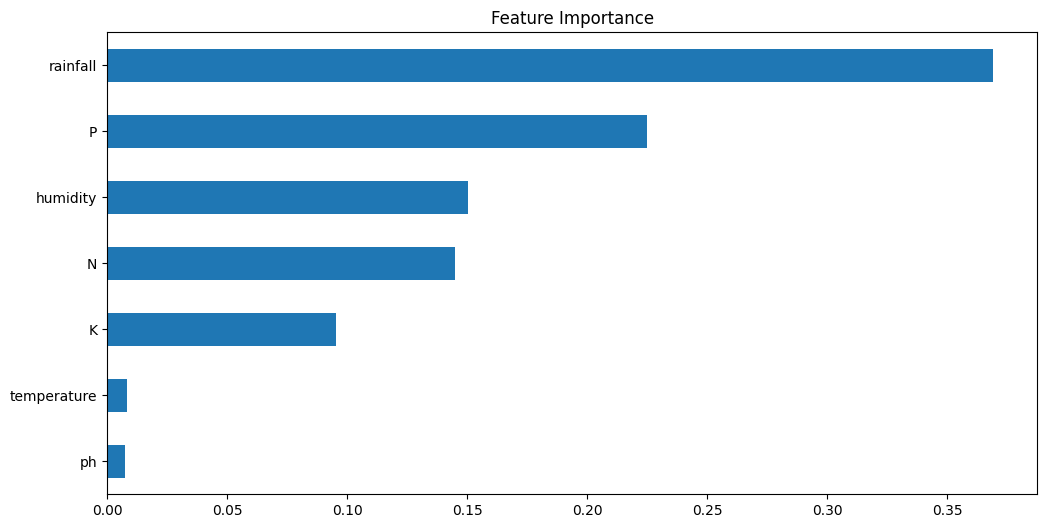

In [33]:
# Plot the feature importance scores of the model as a horizontal bar chart
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(12,6))
plt.title("Feature Importance")
plt.show()

In [34]:
# Checking the model prediction
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    pred_num = model.predict(features)[0]         
    pred_crop = le.inverse_transform([pred_num])  
    return pred_crop[0]

In [35]:
recommended = recommend_crop(70, 4, 4, 21, 8, 25, 0)
print("Recommended Crop:", recommended)

Recommended Crop: muskmelon


In [36]:
# Save the trained model and label encoder as pickle files for future use
import pickle
with open("crop_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("Model + Encoder exported successfully!")

Model + Encoder exported successfully!
